<a href="https://colab.research.google.com/github/Eduardo775/CENIDET/blob/main/DR_ECV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Heart Disease Prediction Project

### Import bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

For processing the data, I'll import the neccessary libraries to split the available dataset for testing and training purposes. To scale the features, I am using StandardScaler.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In order to get a better understanding and try out different approaches, I will import all the different Machine Learning algorithms that will be used.

In [3]:
from sklearn.neighbors import KNeighborsClassifier  #K Neighbors Classifier
from sklearn.svm import SVC #Support Vector Classifier
from sklearn.tree import DecisionTreeClassifier #Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier #Random Forest Classifier
from sklearn.linear_model import LogisticRegression #Logistic Regression

##For hyperparameter tuning
from sklearn.model_selection import GridSearchCV
##All the metrics for evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Investigate the data and exploratory data analysis
(downloaded from Kaggle: https://www.kaggle.com/ronitf/heart-disease-uci)

In [16]:
df = pd.read_csv('/content/sample_data/processed_cleveland.csv') #read_csv since the file format of the downloaded data is csv
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,clase
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
2,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
3,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
4,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  clase     303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [6]:
print('Data Sum of Null Values \n')
df.isnull().sum()

Data Sum of Null Values 



age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
clase       0
dtype: int64

Using the _info()_ method, we can check the shape of the dataset. We have 303 rows and no missing values and there are a total of 13 features with one target variable.

#### Feature explanation

1.- EDAD: edad en años
2.- SEXO: sexo (1= masculino; 0= femenino)
3.- CP: tipo de dolor de pecho
        -- Valor 1: angina típica
        -- Valor 2: angina atípica
        -- Valor 3: dolor no anginoso
        -- Valor 4: asintomático

4.-TRESBPS: presión arterial en reposo (en mm Hg al ingreso al
        hospital)
5.-CHOL: colestoral sérico en mg/dl
6.-FBS: (azúcar en sangre en ayunas > 120 mg/dl) (1 = verdadero; 0 = falso)

7.-RESTECG:resultados electrocardiográficos en reposo
        -- Valor 0: normal
        -- Valor 1: tener anormalidad de onda ST-T (inversiones de onda T y/o ST
                    elevación o depresión de > 0,05 mV)
        -- Valor 2: mostrando hipertrofia ventricular izquierda probable o definitiva
                    según el criterio de Estes

8.-THALACH:frecuencia cardíaca máxima alcanzada

9.-EXANG:angina inducida por ejercicio (1 = sí; 0 = no)
10.-OLDPEAK:depresión del ST inducida por el ejercicio en relación con el reposo
11.-SLOPE: la pendiente del segmento ST de ejercicio máximo
        -- Valor 1: ascendente
        -- Valor 2: plano
        -- Valor 3: descendente

12.-CA:número de vasos principales (0-3) coloreados por fluoroscopia

13.-THAL (thalassemia): 3 = normal; 6 = defecto fijo; 7 = defecto reversible; (trastorno sanguíneo hereditario que hace que tu cuerpo tenga menos hemoglobina de lo normal)

14.-CLASS:diagnóstico de enfermedad cardíaca (estado de enfermedad angiográfico)
        -- Valor 0: < 50% estrechamiento del diámetro
        -- Valor 1: > 50% estrechamiento del diámetro

#### Cheking the realitionship between features with a correlaction map and pairplot

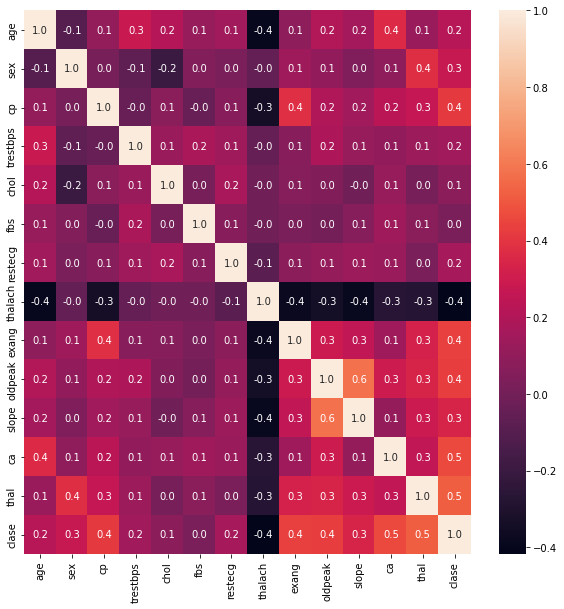

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

In [ ]:
sns.pairplot(df)
plt.show()

#### It's always a good practice to work with a dataset where the target classes are of approximately equal size. Thus, let's check for the same.

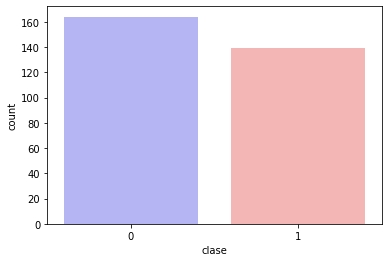

In [ ]:
#class (0= no tiene ECV; 1= si tiene ECV)
sns.countplot(x="clase", data=df, palette="bwr")
plt.show()

The classes are nem exactly 50%-50% but the defference between the classes is not significant, therefore, we do not have to do any further steps.

#### Let's check the distribution in sex

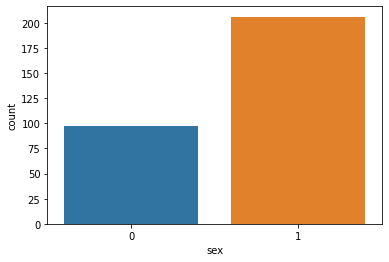

In [ ]:
#Sex (1 = male; 0 = female)
sns.countplot(df.sex)
plt.show()

In [8]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
all_ = len(df.sex)
print("Porcentaje de pasientes Femeninos: {:.2f}%".format((countFemale / all_*100)))
print("Percentaje de pasientes Masculino: {:.2f}%".format((countMale / all_*100)))

Porcentaje de pasientes Femeninos: 32.01%
Percentaje de pasientes Masculino: 67.99%


In the above output, I wish it would be good if there was an equal proportion of people. At the moment it seems to be imbalance value. (**Can be a problem**)

In [ ]:
df.groupby('clase').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
clase,,,,,,,,,,,,,
0,52.585366,0.560976,2.792683,129.250000,242.640244,0.140244,0.835366,158.378049,0.140244,0.586585,1.408537,0.280549,3.803049
1,56.625899,0.820144,3.589928,134.568345,251.474820,0.158273,1.172662,139.258993,0.546763,1.574101,1.827338,1.134317,5.832374


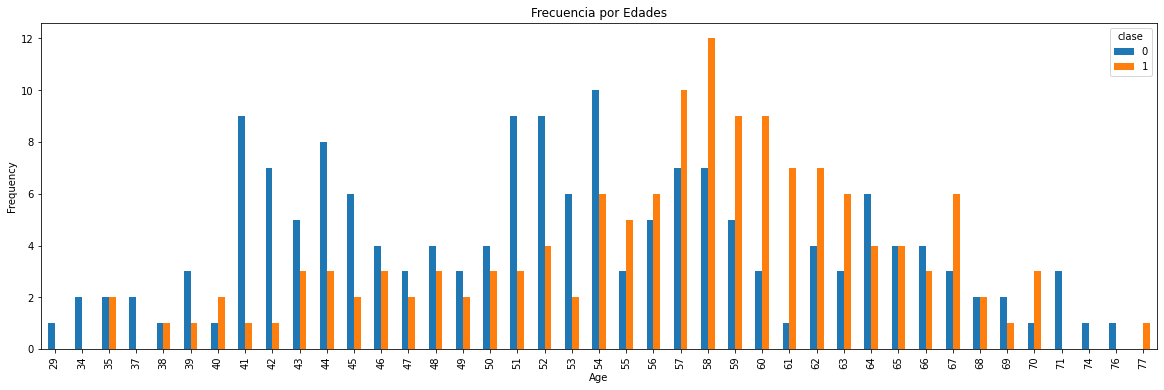

In [ ]:
pd.crosstab(df.age,df.clase).plot(kind="bar",figsize=(20,6))
plt.title('Frecuencia por Edades')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Model Training

In [22]:
#function that will print out all the important details about each training
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        cm=confusion_matrix(y_train,pred)
        #sns.heatmap(cm,annot=True)
        plt.show()
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
        cm=confusion_matrix(y_test,pred)
       # sns.heatmap(cm,annot=True)
        plt.show()

### !!!IMPORTANT !!!!
Before we start our training, we have to split our dataset to training and test set. If we have it, it's time to build a machine learning model.

In [19]:
X = df.drop('clase', axis=1)
y = df.clase

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 4. Decision Tree Classifier

In [23]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree_clf = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=10)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

tree_clf_tuned = DecisionTreeClassifier(**best_params)
tree_clf_tuned.fit(X_train, y_train)

print_score(tree_clf_tuned, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf_tuned, X_train, y_train, X_test, y_test, train=False)

Fitting 10 folds for each of 4332 candidates, totalling 43320 fits
Best_params: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 9, 'min_samples_split': 4, 'splitter': 'random'}
Train Result:
Accuracy Score: 82.55%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.814516   0.840909  0.825472    0.827713      0.826592
recall       0.878261   0.762887  0.825472    0.820574      0.825472
f1-score     0.845188   0.800000  0.825472    0.822594      0.824513
support    115.000000  97.000000  0.825472  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[101  14]
 [ 23  74]]

Test Result:
Accuracy Score: 78.02%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.784314   0.775000   0.78022   0.779657      0.780015
recall      0.816327   0